In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import pandas as pd

In [2]:
train_data = pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
test_data = pd.read_csv('../LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

x_train=train_data.drop('label',axis=1).values
y_train=train_data['label'].values

x_test=test_data.drop('label',axis=1).values
y_test=test_data['label'].values

num_classes=10

x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

x_train=x_train.reshape((-1,32*32*3))   # -1,28*28
x_test=x_test.reshape((-1,32*32*3))   # -1,28*28

y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [3]:
model=Sequential()
model.add(Dense(128,input_shape=(32*32*3,),activation="relu"))    #28*28
model.add(Dense(64,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=128)   #11

Epoch 1/50
391/391 [==============================] - 6s 13ms/step - loss: 2.0320 - accuracy: 0.2742 - val_loss: 1.9052 - val_accuracy: 0.3200
Epoch 2/50
391/391 [==============================] - 4s 11ms/step - loss: 1.8619 - accuracy: 0.3428 - val_loss: 1.8240 - val_accuracy: 0.3500
Epoch 3/50
391/391 [==============================] - 5s 12ms/step - loss: 1.7959 - accuracy: 0.3691 - val_loss: 1.7812 - val_accuracy: 0.3655
Epoch 4/50
391/391 [==============================] - 4s 11ms/step - loss: 1.7494 - accuracy: 0.3843 - val_loss: 1.7500 - val_accuracy: 0.3834
Epoch 5/50
391/391 [==============================] - 4s 11ms/step - loss: 1.7076 - accuracy: 0.3998 - val_loss: 1.7004 - val_accuracy: 0.4001
Epoch 6/50
391/391 [==============================] - 4s 11ms/step - loss: 1.6732 - accuracy: 0.4120 - val_loss: 1.6721 - val_accuracy: 0.4152
Epoch 7/50
391/391 [==============================] - 4s 11ms/step - loss: 1.6425 - accuracy: 0.4216 - val_loss: 1.6441 - val_accuracy: 0.4201

In [5]:
score=model.evaluate(x_test,y_test)
print('test loss',score[0])
print('test acc',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.3952 - accuracy: 0.5093
test loss 1.3952151536941528
test acc 0.5092999935150146


In [6]:
import random
class_value=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 [==============================] - 1s 3ms/step
Actual: frog
Predicted: frog


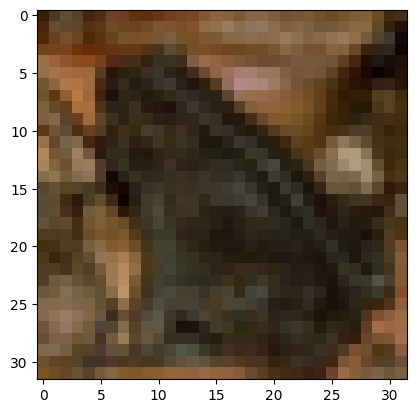

In [7]:
n=30
plt.imshow(x_test[n].reshape(32,32,3),cmap='gray')    #28,28
pred_val=model.predict(x_test)
print("Actual:",class_value[np.argmax(y_test[n])])
print("Predicted:",class_value[np.argmax(pred_val[n])])

In [8]:
# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper right')
# plt.show()

In [ ]:
# # Plot training & validation accuracy values
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()